In [4]:
#======================================================
# Simular algumas espécies de predador e presa
# para descobrir iterações entre elas.
#
# Será que pode existir dois predadores que se ajudam?
# Ou presas que sobrevivem em extrema dificuldade?
#======================================================

In [152]:
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [230]:
def dSdt(t, S, params):
    [a, b, c, d, e, f] = params
    x, y, z = S
    
    return [x*(1 - x) - x*y - x*z, 
            a*x*y - c*y - d*y*z,
           b*x*z - e*z - f*y*z]

def initialData(N):
    u = np.zeros(N)
    v = np.zeros(N)
    w = np.zeros(N)
    for i in range(N):
        u[i] = np.random.random_sample()
        v[i] = np.random.random_sample()
        w[i] = np.random.random_sample()
    return u, v, w

In [275]:
N = 30
S0 = []
for i in range(N):
    prey, predator1, predator2 = initialData(N)
    S0.append((prey[i], predator1[i], predator2[i]))

params = [2, 2, 1, .9, 1, .8]

T = np.linspace(0, 40, 500)
solutions = []
prey_sol = []
predator1_sol = []
predator2_sol = []
for i in range(N):
    solutions.append(odeint(dSdt, y0=S0[i], t=T, tfirst=True, args=(params,)))
    prey_sol.append(solutions[i].T[0])
    predator1_sol.append(solutions[i].T[1])
    predator2_sol.append(solutions[i].T[2])


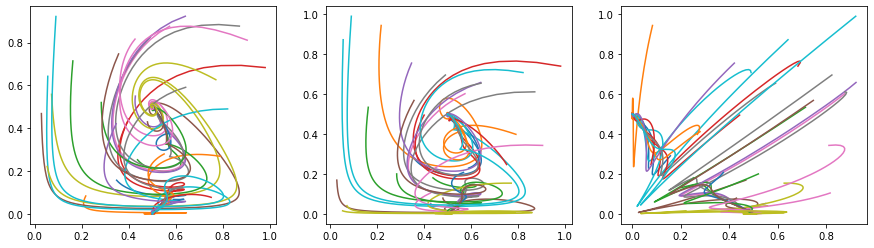

In [276]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

for i in range(N):
    ax = axes[0]
    ax.plot(prey_sol[i], predator1_sol[i])
    ax = axes[1]
    ax.plot(prey_sol[i], predator2_sol[i])
    ax = axes[2]
    ax.plot(predator1_sol[i], predator2_sol[i])

plt.show()

[[3.49127908e-01 3.55004255e-01 3.61261349e-01 ... 5.00000058e-01
  5.00000225e-01 5.00000385e-01]
 [1.57286177e-01 1.50463104e-01 1.44172326e-01 ... 4.22092003e-08
  4.07140388e-08 3.92720621e-08]
 [2.90775148e-01 2.81171118e-01 2.72263359e-01 ... 4.99995656e-01
  4.99995667e-01 4.99995690e-01]]


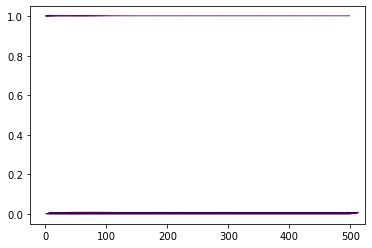

In [287]:
prey_vel = []
pred1_vel = []
pred2_vel = []
for i in range(N):
    prey_vel.append(dSdt(0, solutions[i][0], params)[0])
    pred1_vel.append(dSdt(0, solutions[i][0], params)[1])
    pred2_vel.append(dSdt(0, solutions[i][0], params)[2])

print(solutions[0].T)
plt.quiver([prey_sol[0], predator1_sol[0]], prey_vel[0], pred1_vel[0])
